In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



# <span style="font-family:Anta; text-align:center"> Import Data </span>

In [3]:
data=pd.read_csv("E:\GPL\Guided_learing_program\Project 3\RTA Dataset.csv")
print(f"rows : {data.shape[0]} , columns : {data.shape[1]}") # shape of data set

rows : 12316 , columns : 32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
data.describe(include='all').T #statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,12316,1074,15:30:00,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_week,12316,7,Friday,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_band_of_driver,12316,5,18-30,4271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex_of_driver,12316,3,Male,11437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational_level,11575,7,Junior high school,7619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_driver_relation,11737,4,Employee,9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_experience,11487,7,5-10yr,3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_vehicle,11366,17,Automobile,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_of_vehicle,11834,4,Owner,10459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_year_of_vehicle,8388,6,Unknown,2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="font-family:Anta;text-align:center">📊 Exploratory Data Analysis</span>

In [6]:
data.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
numerical_features=[features for features in data.columns if data[features].dtype!=object]
categorical_feature=[features for features in data.columns if data[features].dtype==object]
print(f"numerical_features are {len(numerical_features)}")
print(f"categorical_feature are {len(categorical_feature)}")

numerical_features are 2
categorical_feature are 30


In [9]:
data[data=='?'].value_counts()

Series([], Name: count, dtype: int64)

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1em;">
there is no ? values

In [10]:
print('----------missing_values----------')
missing_values=round((data.isna().sum()/data.shape[0])*100).astype(str)+"%"
print(missing_values)


----------missing_values----------
Time                            0.0%
Day_of_week                     0.0%
Age_band_of_driver              0.0%
Sex_of_driver                   0.0%
Educational_level               6.0%
Vehicle_driver_relation         5.0%
Driving_experience              7.0%
Type_of_vehicle                 8.0%
Owner_of_vehicle                4.0%
Service_year_of_vehicle        32.0%
Defect_of_vehicle              36.0%
Area_accident_occured           2.0%
Lanes_or_Medians                3.0%
Road_allignment                 1.0%
Types_of_Junction               7.0%
Road_surface_type               1.0%
Road_surface_conditions         0.0%
Light_conditions                0.0%
Weather_conditions              0.0%
Type_of_collision               1.0%
Number_of_vehicles_involved     0.0%
Number_of_casualties            0.0%
Vehicle_movement                3.0%
Casualty_class                  0.0%
Sex_of_casualty                 0.0%
Age_band_of_casualty            0.0%
Cas

In [11]:
print('----------missing_values_columns----------')
missing_values_columns=[columns for columns,missing_per in ((data.isna().sum()/data.shape[0])*100).items() if missing_per>20]
print(missing_values_columns)

----------missing_values_columns----------
['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']


<Axes: xlabel='Accident_severity', ylabel='Count'>

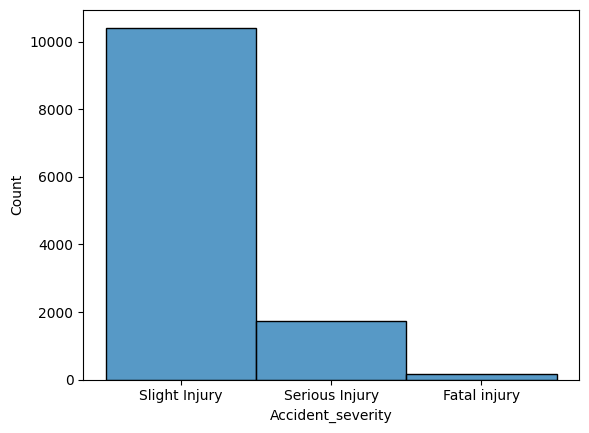

In [12]:
sns.histplot(data['Accident_severity'])


C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9160\1368550891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driving_experienced.index,y=driving_experienced.values,palette='bright',ax=ax[0])
C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9160\1368550891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Type_of_collision.index,y=Type_of_collision.values,palette='bright',ax=ax[1])


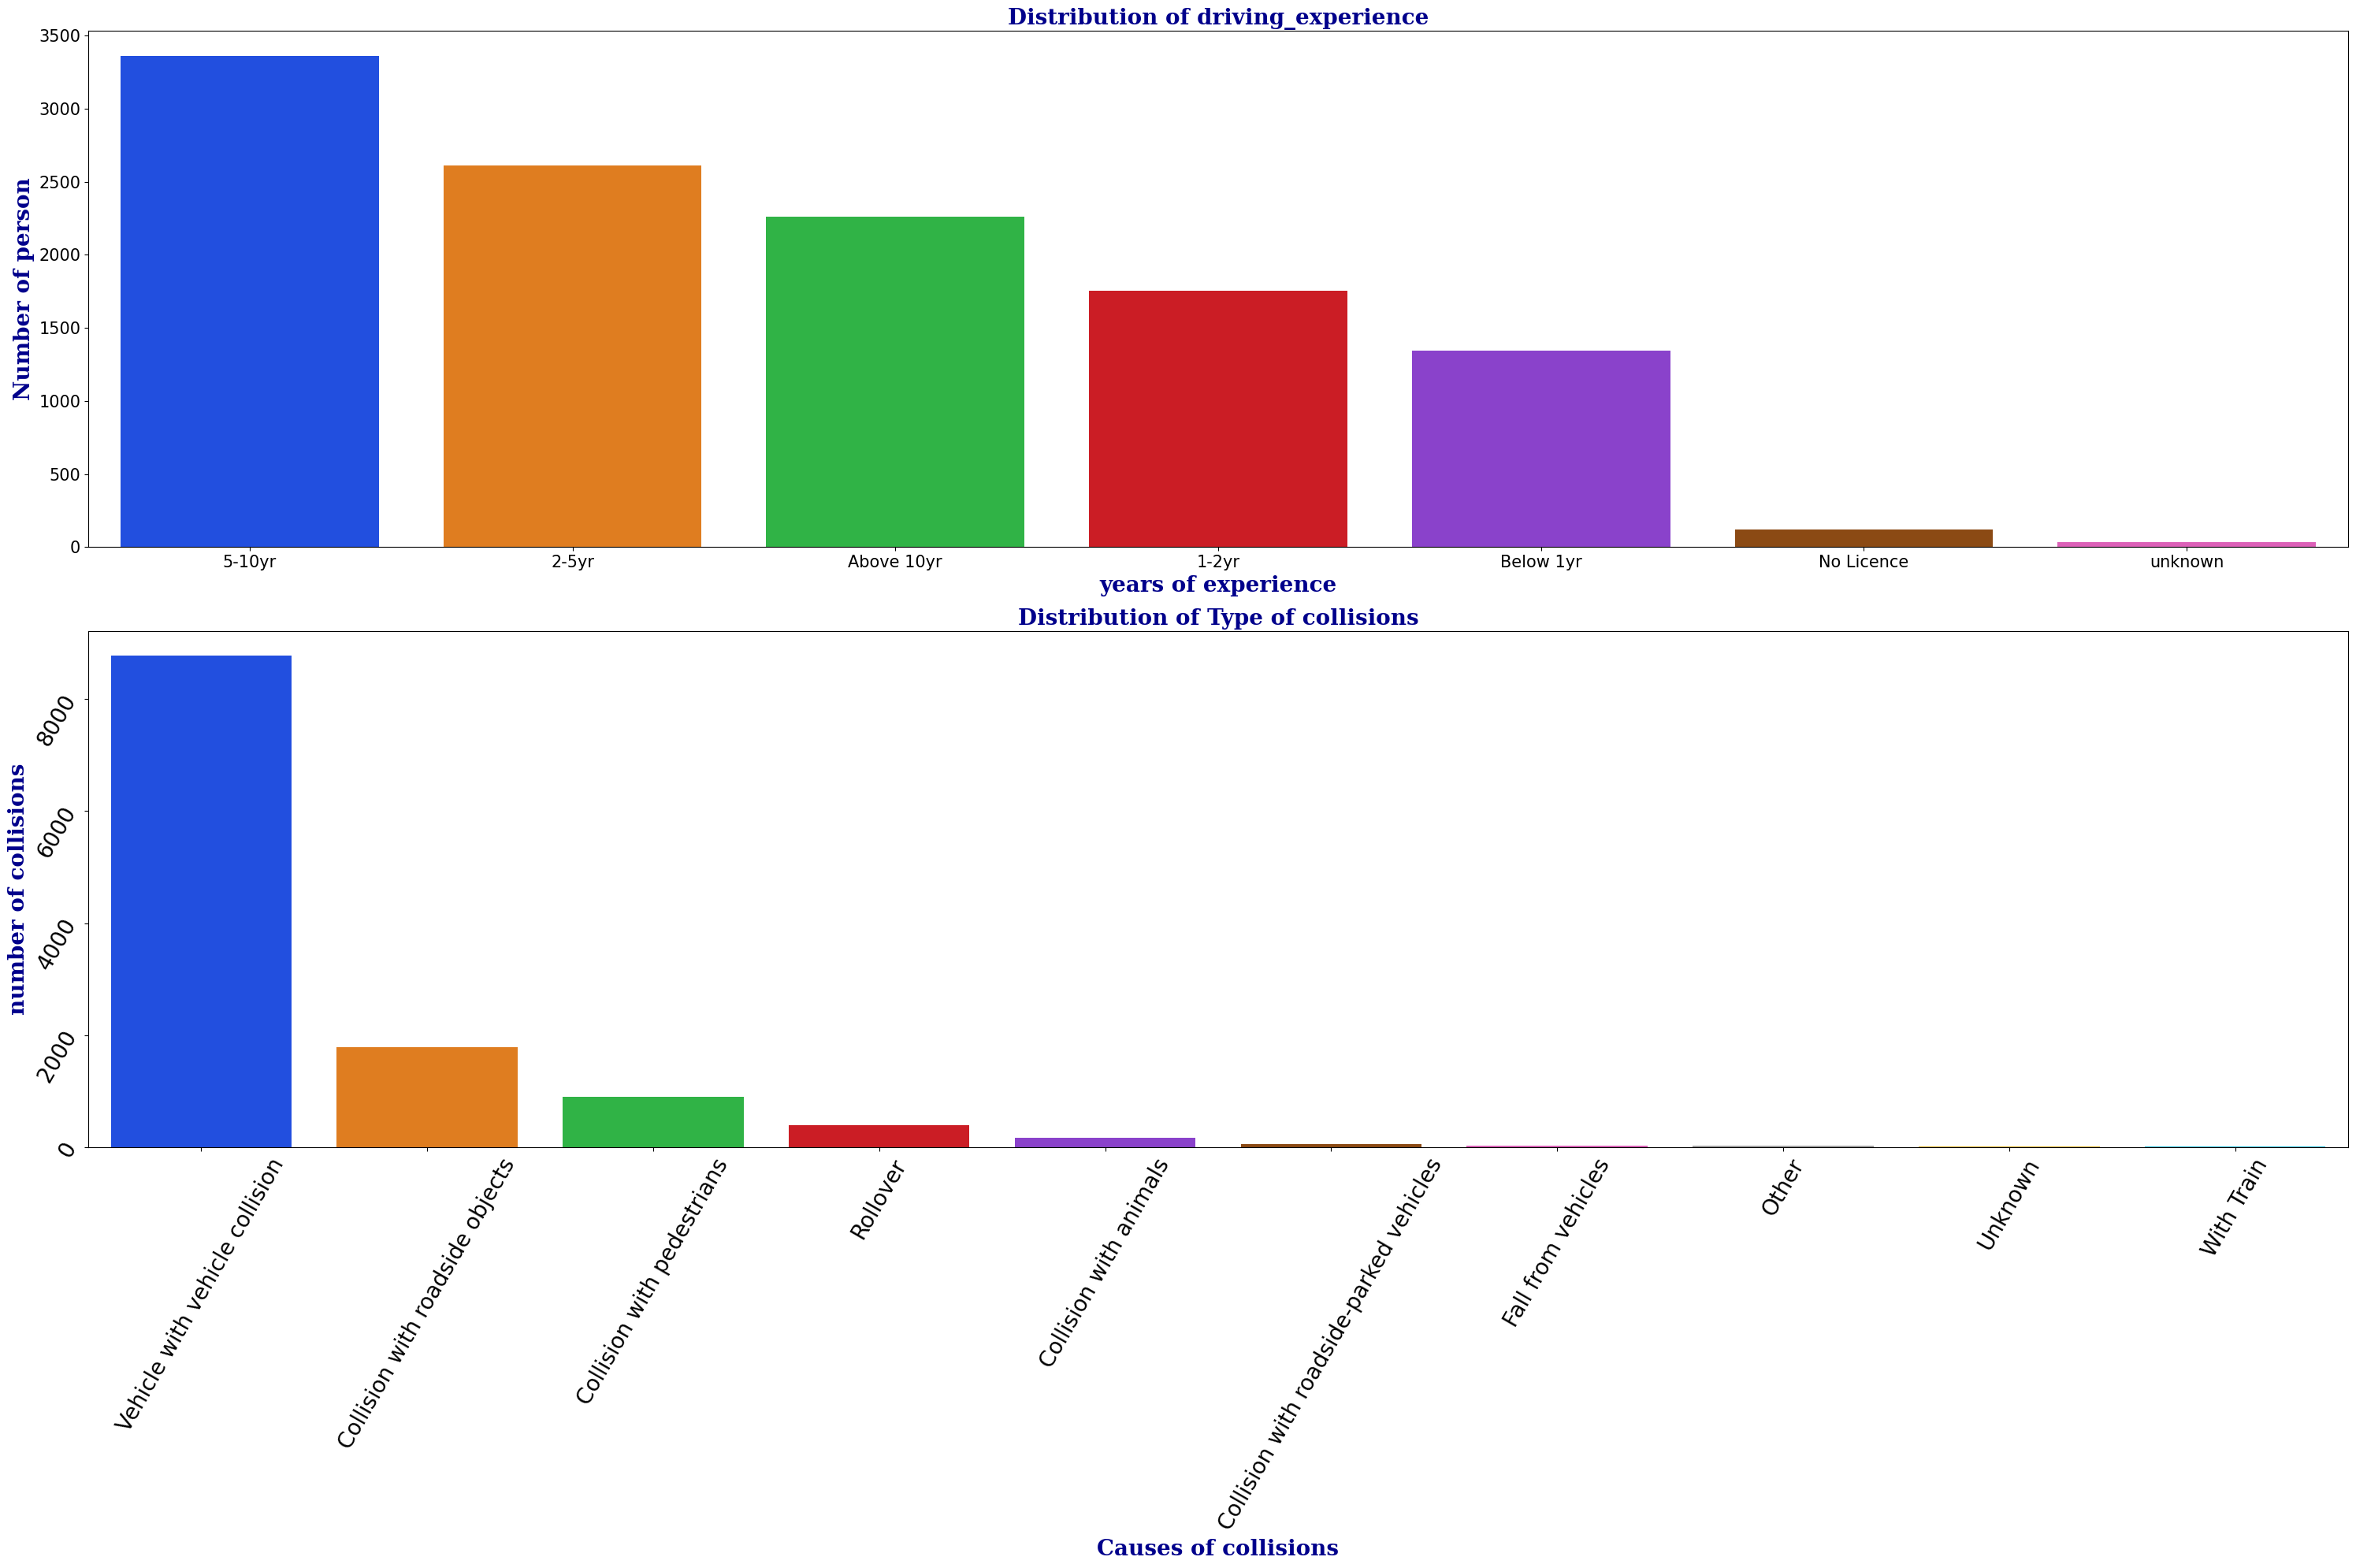

In [13]:
fig,ax=plt.subplots(2,figsize=(30,20))

driving_experienced=data['Driving_experience'].value_counts()
sns.barplot(x=driving_experienced.index,y=driving_experienced.values,palette='bright',ax=ax[0])
ax[0].set_title('Distribution of driving_experience',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].set_xlabel("years of experience",fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].set_ylabel("Number of person",fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].tick_params(labelsize=15)

Type_of_collision=data['Type_of_collision'].value_counts()
sns.barplot(x=Type_of_collision.index,y=Type_of_collision.values,palette='bright',ax=ax[1])
ax[1].set_title('Distribution of Type of collisions',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})#fontname: serif, cursive, sans-serif, fantasy, monospace.color: blue, green, cyan, white, yellow, etc.
ax[1].set_xlabel('Causes of collisions',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[1].set_ylabel('number of collisions',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[1].tick_params(labelsize=20,labelrotation=60)
plt.tight_layout()
plt.show()



C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9160\762486032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_of_driver.index,y=sex_of_driver.values,palette='bright',ax=ax[0])
C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9160\762486032.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Educational_level.index,y=Educational_level.values,palette='bright',ax=ax[1])


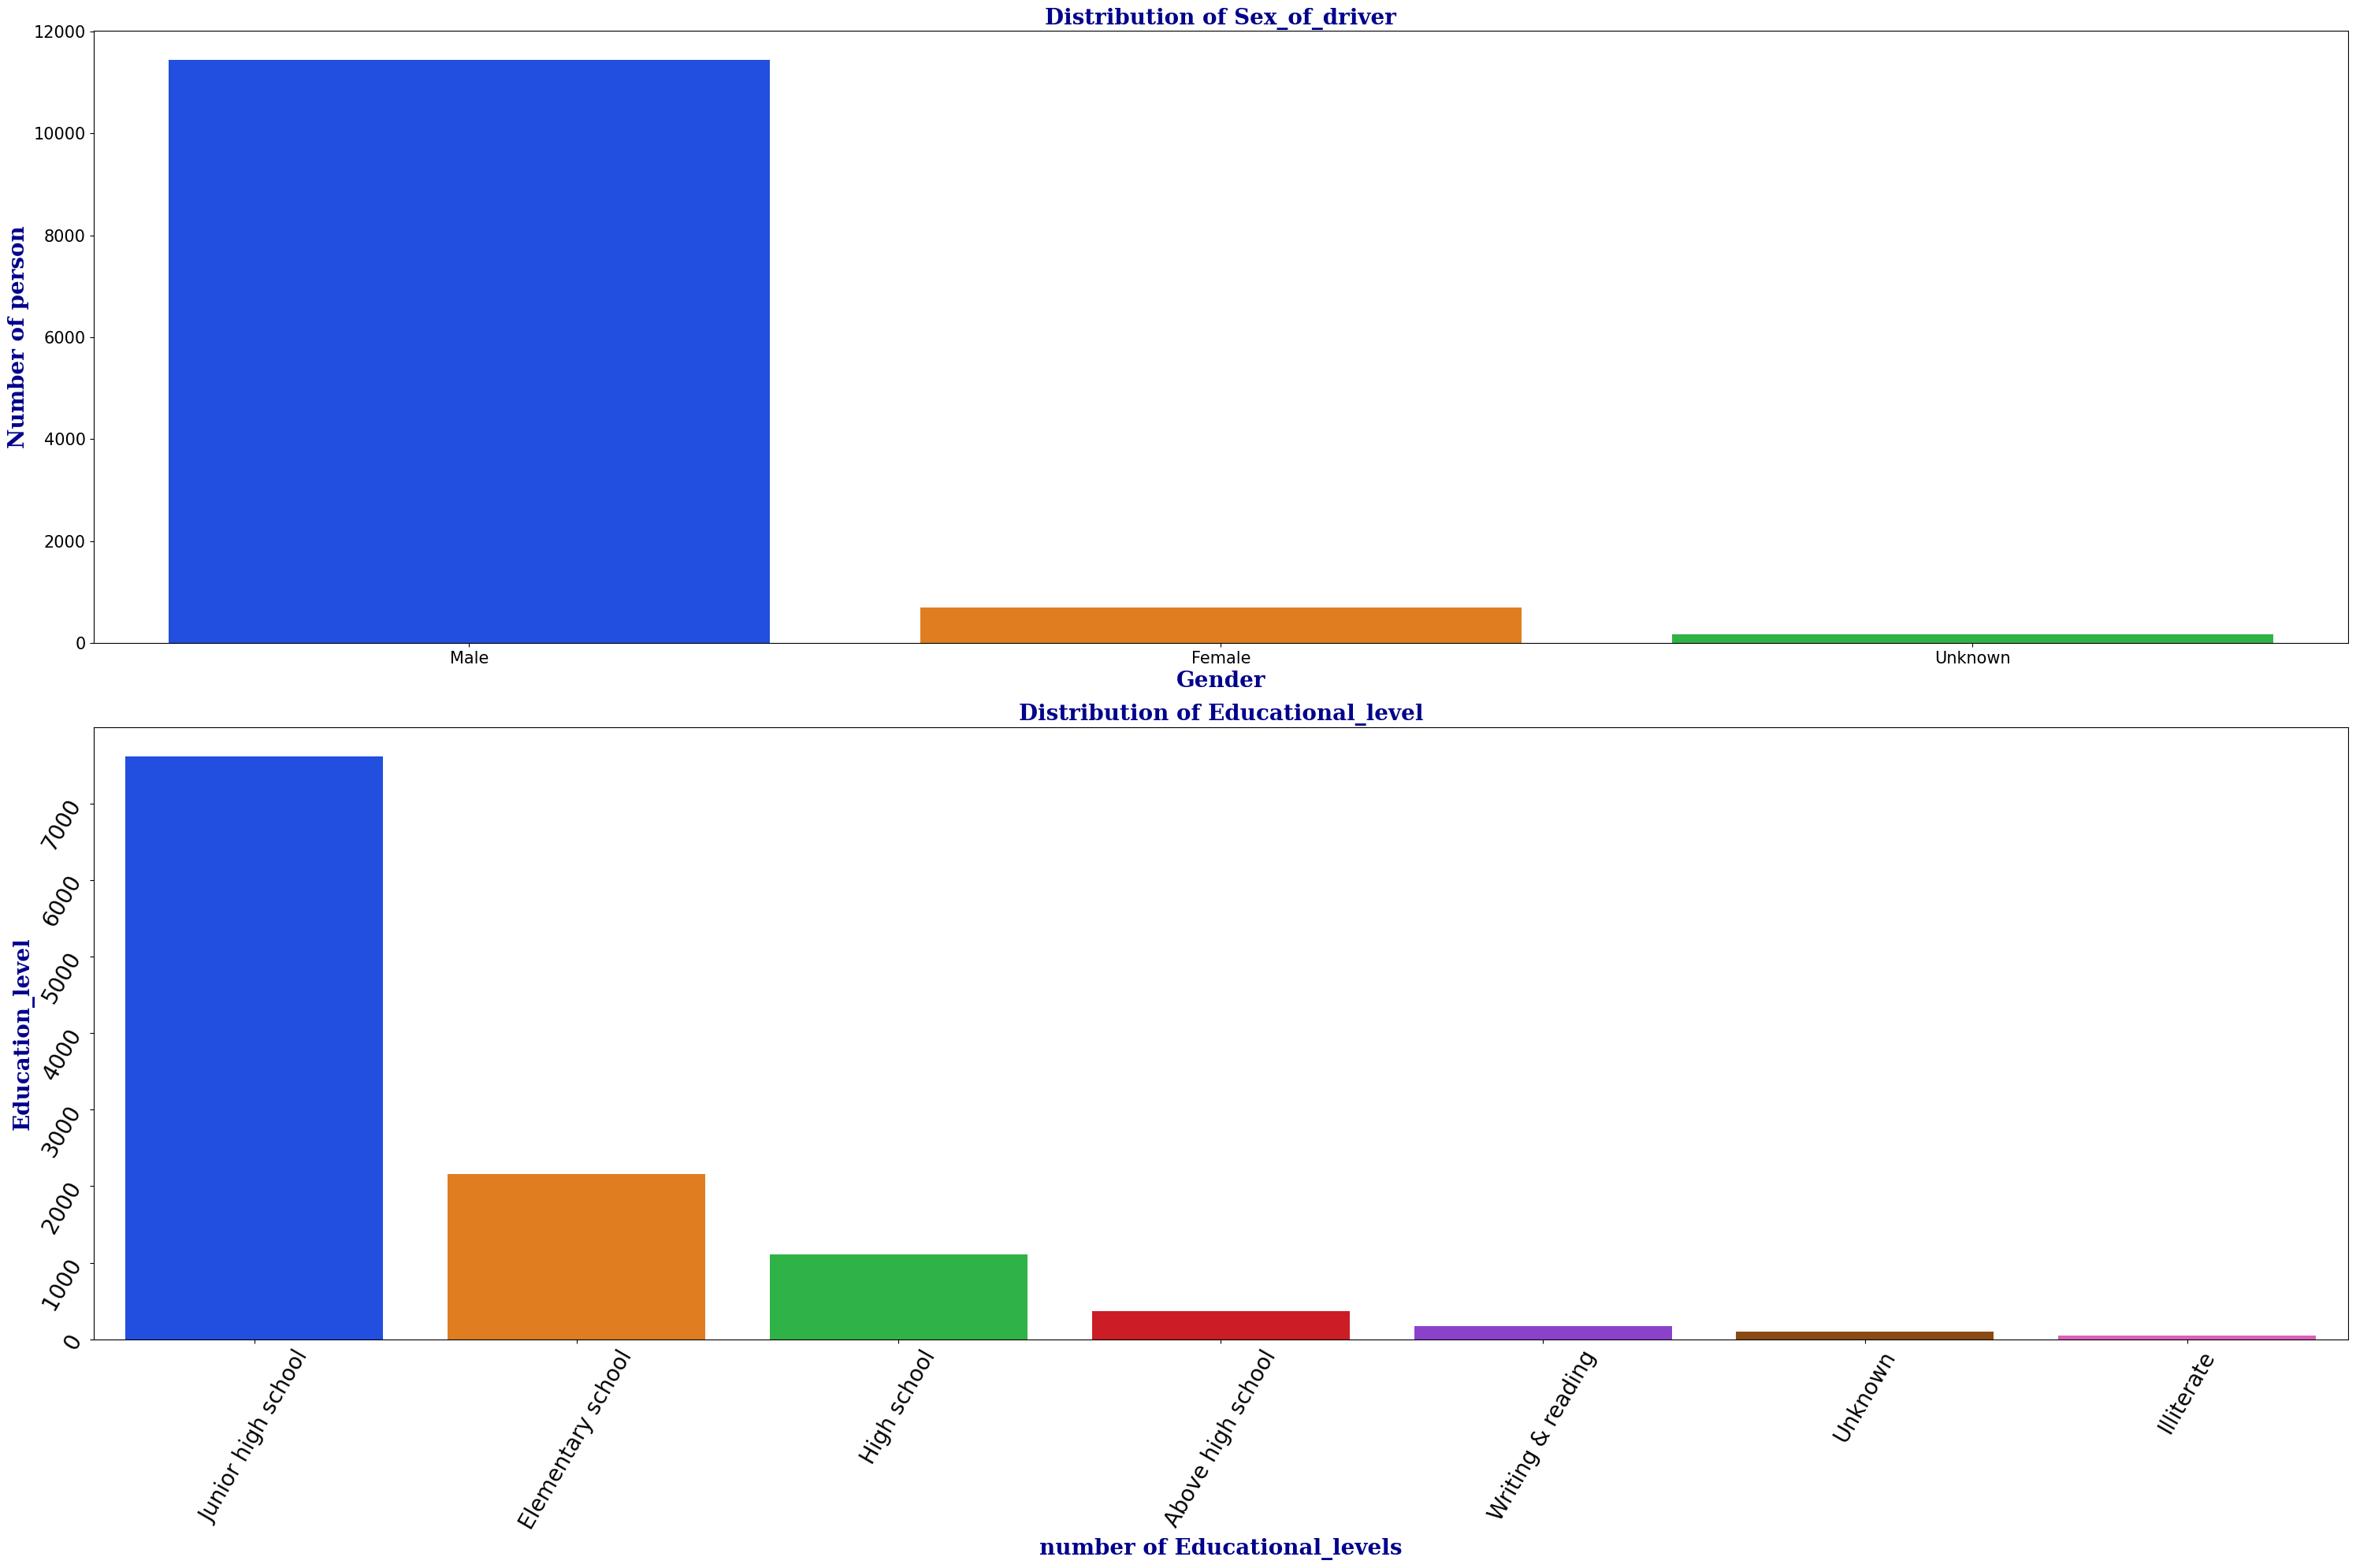

In [14]:
fig,ax=plt.subplots(2,figsize=(30,20))

sex_of_driver=data['Sex_of_driver'].value_counts()
sns.barplot(x=sex_of_driver.index,y=sex_of_driver.values,palette='bright',ax=ax[0])
ax[0].set_title('Distribution of Sex_of_driver',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].set_xlabel("Gender",fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].set_ylabel("Number of person",fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[0].tick_params(labelsize=15)

Educational_level=data['Educational_level'].value_counts()
sns.barplot(x=Educational_level.index,y=Educational_level.values,palette='bright',ax=ax[1])
ax[1].set_title('Distribution of Educational_level',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})#fontname: serif, cursive, sans-serif, fantasy, monospace.color: blue, green, cyan, white, yellow, etc.
ax[1].set_ylabel('Education_level',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[1].set_xlabel('number of Educational_levels',fontdict={'fontname':'serif', 'fontsize':20,'fontweight':'bold','color':"darkblue"})
ax[1].tick_params(labelsize=20,labelrotation=60)
plt.tight_layout()
plt.show()


In [15]:
data.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [16]:
Cause_of_accident=data['Cause_of_accident'].value_counts()

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9160\2576336676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Cause_of_accident.values,y=Cause_of_accident.index,palette='bright')


<Axes: ylabel='Cause_of_accident'>

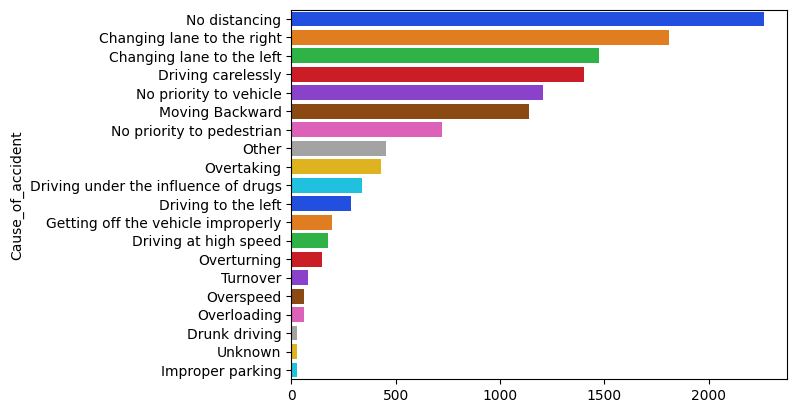

In [17]:
sns.barplot(x=Cause_of_accident.values,y=Cause_of_accident.index,palette='bright')

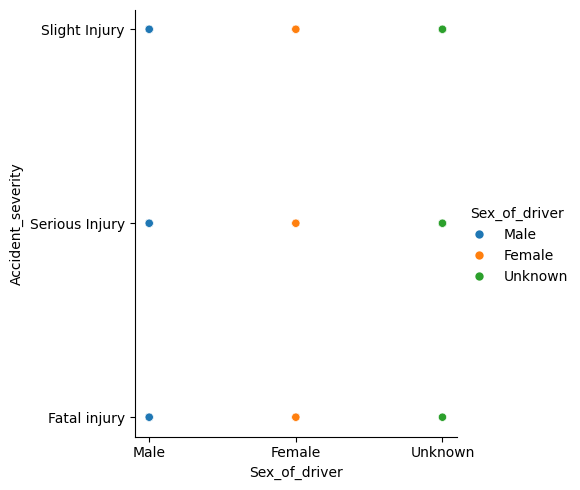

In [18]:
sns.relplot(x=data['Sex_of_driver'],y=data['Accident_severity'],data=data,hue=data['Sex_of_driver'])

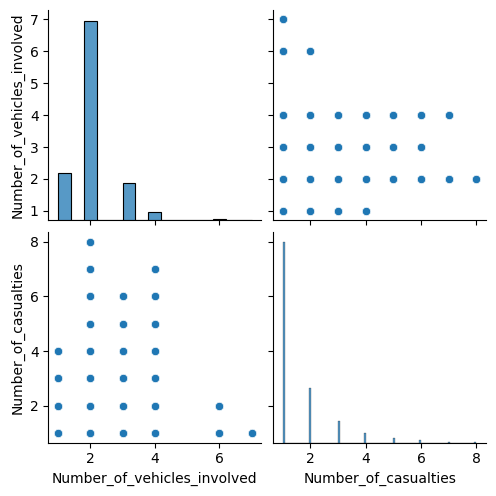

In [19]:
sns.pairplot(data=data)


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

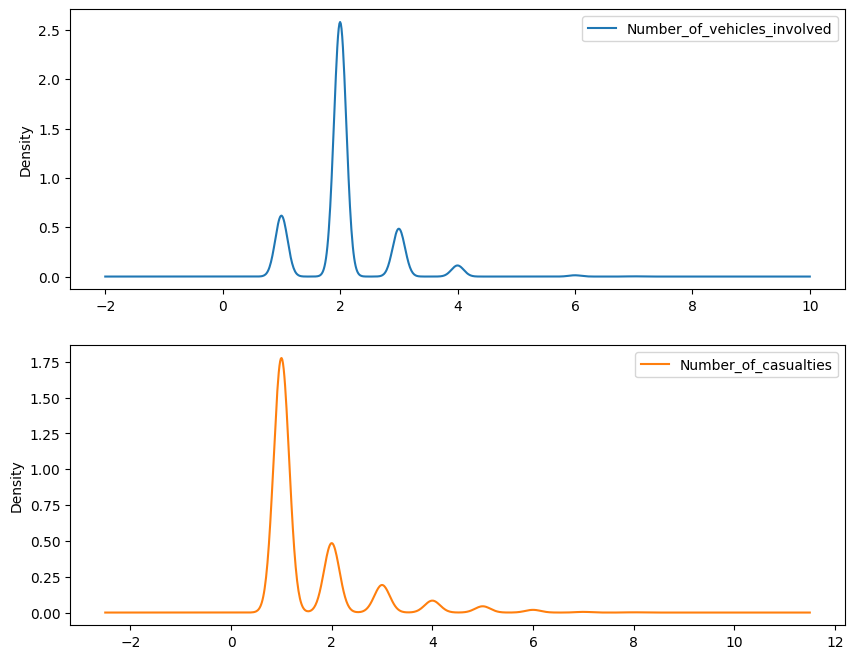

In [20]:
data.plot(kind='density',
          subplots=True,
          figsize=(10,8),
          sharex=False,
          sharey=False,)


<Axes: xlabel='Accident_severity', ylabel='count'>

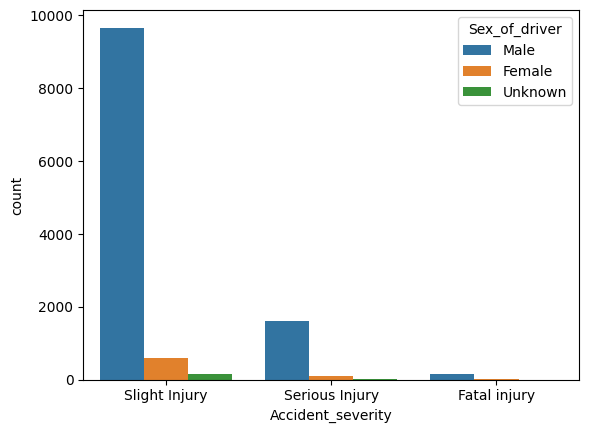

In [21]:
# sns.stripplot(x=data['Sex_of_driver'],y=data['Accident_severity'])
# sns.violinplot(data=data,x='Sex_of_driver',y='Accident_severity')
sns.countplot(data=data,x='Accident_severity',hue='Sex_of_driver',stat='count')

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1em;"><h3 align="left"><font color='#00008b'>Observation:</font></h3>

* With the help of this graph, the ratio of male injuries is far larger than that of females or unknowns 

# Pre Processing

In [22]:
data.drop(missing_values_columns,axis=1,inplace=True)


In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [25]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Time'] = data['Time'].dt.hour

In [26]:
data['Time']

1        17
3         1
7        17
8        17
9        17
         ..
12309     9
12312    18
12313    13
12314    13
12315    13
Name: Time, Length: 8439, dtype: int32

In [27]:
data.select_dtypes(include='object').columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [28]:
# categorical_cols=data.select_dtypes(include='object').columns

# data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [29]:
backup_data=data.copy(deep=True)

In [31]:
x,y=data.drop('Accident_severity',axis=1),data['Accident_severity']

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_balanced, Y_balanced = ros.fit_resample(x,y)

In [33]:
print('The class Imbalance in the data is given below')
print(Y_balanced.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_balanced.value_counts(normalize=100)*100}")

The class Imbalance in the data is given below
Accident_severity
Slight Injury     7169
Serious Injury    7169
Fatal injury      7169
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
Accident_severity
Slight Injury     33.333333
Serious Injury    33.333333
Fatal injury      33.333333
Name: proportion, dtype: float64


In [ ]:
# x = X_balanced
# y= Y_balanced

# k_best = SelectKBest(k=50)
# X_selected = k_best.fit_transform(x,y)

# # Get the names of the selected columns
# selected_columns = x.columns[k_best.get_support(indices=True)]

# # Display the selected column names
# print("Selected Columns:", selected_columns)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)


In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (17205, 27)
X_test shape: (4302, 27)
Y_train shape: (17205,)
Y_test shape: (4302,)


In [37]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,7,Tuesday,31-50,Male,Junior high school,Owner,Below 1yr,Pick up upto 10Q,Owner,Church areas,...,Vehicle with vehicle collision,1,1,Turnover,Driver or rider,Male,Over 51,3,Not a Pedestrian,Driving at high speed
1,18,Tuesday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Other,...,Collision with pedestrians,2,4,Going straight,Driver or rider,Male,Under 18,3,Not a Pedestrian,Driving under the influence of drugs
2,16,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Church areas,...,Collision with roadside objects,2,2,Going straight,Pedestrian,Male,18-30,3,Not a Pedestrian,Other
3,2,Saturday,Unknown,Female,Junior high school,Employee,Above 10yr,Other,Owner,Office areas,...,Vehicle with vehicle collision,1,1,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,Changing lane to the right
4,18,Saturday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,...,Vehicle with vehicle collision,2,4,Going straight,na,na,na,na,Not a Pedestrian,Driving carelessly


In [38]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,23,Saturday,Under 18,Male,Elementary school,Employee,5-10yr,Public (12 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,3,Going straight,Driver or rider,Male,Under 18,2,Not a Pedestrian,Moving Backward
1,20,Thursday,Under 18,Male,Junior high school,Employee,Above 10yr,Special vehicle,Owner,Office areas,...,Vehicle with vehicle collision,2,5,Going straight,na,na,na,na,Not a Pedestrian,No priority to vehicle
2,16,Tuesday,31-50,Male,Junior high school,Employee,5-10yr,Pick up upto 10Q,Owner,Office areas,...,Rollover,2,1,Reversing,Driver or rider,Male,18-30,3,Not a Pedestrian,Turnover
3,0,Saturday,18-30,Male,High school,Owner,Above 10yr,Lorry (41?100Q),Owner,Other,...,Vehicle with vehicle collision,3,3,Going straight,na,na,na,na,Not a Pedestrian,No distancing
4,18,Saturday,Over 51,Male,High school,Employee,Above 10yr,Automobile,Organization,Residential areas,...,Vehicle with vehicle collision,2,3,Getting off,Driver or rider,Male,18-30,3,Not a Pedestrian,No priority to vehicle


In [39]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode=data.select_dtypes(include='object').columns
columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

KeyError: "['Accident_severity'] not found in axis"